<a href="https://colab.research.google.com/github/fovi-llc/trading_evolved/blob/main/Chapter%207%20-%20Backtesting%20Trading%20Strategies/First%20Zipline%20Backtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### First Zipline Backtest

This is the "Hello World" of Zipline backtests from the book ***Trading Evolved***  by Andreas F. Clenow (https://www.followingthetrend.com/trading-evolved/).  These Google Colab installation preliminaries are by [Jim White](https://www.linkedin.com/in/jamespaulwhite/) and the notebook is in GitHub at [https://github.com/fovi-llc/trading_evolved/Chapter 7 - Backtesting Trading Strategies/First Zipline Backtest.ipynb](https://github.com/fovi-llc/trading_evolved/blob/main/Chapter%207%20-%20Backtesting%20Trading%20Strategies/First%20Zipline%20Backtest.ipynb).  That is code from Clenow's book packaged by Ahmed Aboumalwa at https://github.com/ahmedengu/trading_evolved with updates from https://github.com/RiseT/trading_evolved.

### Install TA-Lib

Colab doesn't have the C/C++ TA-Lib (https://ta-lib.org/) library installed and it isn't in one of the Linux distros it uses either so installing here is annoying.

This is a fast way to get TA-Lib installed including the binary for Colab that will work for zipline-reloaded but the script will break when Colab upgrades to Python 3.11.

Even though the PyPi `ta-lib-bin` supplies the Python package `talib` it won't satisify `zipline-reloaded` dependency on the PyPi `ta-lib`.  That will result in it trying to install the PyPi `ta-lib` which will fail to build its wheel on Colab.  So the workaround is to install `ta-lib-bin` then make a copy of it with the name `ta-lib` which will satisify the dependency requirement.

In [ ]:
%%bash

pip install ta-lib-bin==0.4.26
pip show ta-lib-bin|grep Location
cd /usr/local/lib/python3.10/dist-packages
cp -R ta_lib_bin.libs ta_lib.libs
cp -R ta_lib_bin-0.4.26.dist-info ta_lib-0.4.26.dist-info
sed -i 's/^Name: ta-lib-bin/Name: ta-lib/' ta_lib-0.4.26.dist-info/METADATA
diff -u ta_lib_bin-0.4.26.dist-info/METADATA ta_lib-0.4.26.dist-info/METADATA
[ $? -eq 1 ] && exit 0
echo "Should have got diff for name in METADATA file"
exit 1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.1 MB/s eta 0:00:00
Location: /usr/local/lib/python3.10/dist-packages
--- ta_lib_bin-0.4.26.dist-info/METADATA	2024-09-22 23:00:28.122164238 +0000
+++ ta_lib-0.4.26.dist-info/METADATA	2024-09-22 23:00:33.512705317 +0000
@@ -1,5 +1,5 @@
 Metadata-Version: 2.1
-Name: ta-lib-bin
+Name: ta-lib
 Version: 0.4.26
 Summary: Python wrapper for TA-Lib
 Home-page: https://github.com/minggnim/ta-lib


### Building TA-Lib binary on Colab.

If the above doesn't work for you, this should but it is more complicated.

Colab doesn't have the C/C++ TA-Lib (https://ta-lib.org/) library installed so we have to build it. This takes a while so I recommend activating Google Drive using the cell below then running this script cell.. Of course if the Linux environment changes then that will need to be deleted and rebuilt.

A shell script to build the TA-Lib C/C++ library based on this https://github.com/TA-Lib/ta-lib-python/issues/590#issuecomment-1534248996.

In [ ]:
%%bash

pip show ta-lib
if [ $? -eq 0 ]; then
  echo "ta-lib is already installed"
  exit 0
fi
pwd
if [ -d ta-lib ]; then
  echo "ta-lib directory exists."
else
  wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
  tar -xzf ta-lib-0.4.0-src.tar.gz
fi
cd ta-lib
./configure --prefix=/usr
make
make install

Name: ta-lib
Version: 0.4.26
Summary: Python wrapper for TA-Lib
Home-page: https://github.com/minggnim/ta-lib
Author: John Benediktsson
Author-email: mrjbq7@gmail.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: 
ta-lib is already installed


An alternative way to run those commands from [https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab](https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab).

### Install Zipline Reloaded

[Quantopian Zipline](https://github.com/quantopian/zipline) is no longer maintained, but **Stefan Jansen** (https://www.ml4trading.io/) author of the comprehensive (and recommended) book ***Machine Learning for Trading*** which also uses Zipline, has "reloaded" it and the dependencies that also became unsupported after the book was published.  Code for Stefan's book is at https://github.com/stefan-jansen/machine-learning-for-trading and the reloaded Python packages (`zipline-reloaded`, `bcolz-zipline`, `pyfolio-reloaded`, `empyrical-reloaded`, and `alphalens-reloaded`) are here: https://github.com/stefan-jansen?tab=repositories.

I use `bcolz-zipline>=1.2.11` and `numpy<2` conditions here to deal with incompatibilty problems that the move to Numpy 2 cause (https://github.com/stefan-jansen/bcolz-zipline/issues/61).  If you're doing this in the future then hopefully the conditions can be omitted.  Also if you can accept the incompatibilties that other of the Colab PyPi packages have with `numpy>2` then go ahead.

In [ ]:
!pip install "zipline-reloaded>=3.0.4" "bcolz-zipline>=1.2.11" "numpy<2"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.0 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=b39a83f600fdb1b24be4b42e27e93890ad1ba130d78810bdf62539e63832b620
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488

### Data Ingestion

To run a Zipline backtest you first need to "ingest" (load) a data bundle.  The default bundle included in Zipline is Quandl.  Quandl is no longer active and the data is not updated anymore, but the dataset (https://data.nasdaq.com/databases/WIKIP) covers the period 1996-01-01 thru 2018-03-27 and is available with a free API key from [https://data.nasdaq.com/](https://data.nasdaq.com/).

I recommend using Colab secrets for your API key and naming it `QUANDL_API_KEY`. Also, in order to avoid repeatedly ingesting the data I recommend linking Google Drive and setting the `ZIPLINE_ROOT` env var to a folder there.

Also the bundle ingestion takes some time and bandwidth, so I also recommend linking up to your Google Drive and storing the Zipline data there.  

Of course if you're running this locally then you can just use the command line in the usual fashion.

N.B. Linux shell and build scripts don't like there to be spaces (or other "special") characters in paths so Colab plays tricks to hide the space in "My Drive".

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

if not os.environ.get("MY_WORKSPACE"):
  os.environ["MY_WORKSPACE"] = "/content/drive/MyDrive/Workspace"

%mkdir -p /content/drive/MyDrive/Workspace
%cd /content/drive/MyDrive/Workspace
!pwd

from google.colab import userdata

if not os.environ.get("QUANDL_API_KEY"):
  os.environ["QUANDL_API_KEY"] = userdata.get("QUANDL_API_KEY")

if not os.environ.get("ZIPLINE_ROOT"):
  os.environ["ZIPLINE_ROOT"] = os.path.join(os.environ["MY_WORKSPACE"], "zipline")


Mounted at /content/drive
/content/drive/MyDrive/Workspace
/content/drive/MyDrive/Workspace


### List Bundle Ingestions

Before running the Zipline ingest command lets see if you're already done that because every time you run the command it will just add it again, even if you've done it before (because it assumes the data source regularly updates and doesn't know that Quandl is now moribund).

In [ ]:
%%bash

export ZIPLINE_ROOT="$ZIPLINE_ROOT"
echo $ZIPLINE_ROOT
zipline bundles

/content/drive/MyDrive/Workspace/zipline
csvdir <no ingestions>
quandl 2024-09-22 22:18:49.991135
quantopian-quandl <no ingestions>


### Ingest the Quandl Bundle (Once!)

So if that shows no quandl data bundle ingestions then we should do that now. You can also come back a rerun the cell above to see the updated list of bundles, it should list one with a date and timestamp.

I omit the very length output to keep things a little more readable in the notebook.  There are a bunch of complaints about dividends which afaik are mostly benign.

In [ ]:
%%bash

export QUANDL_API_KEY="$QUANDL_API_KEY"
export ZIPLINE_ROOT="$ZIPLINE_ROOT"

zipline ingest -b quandl

### Run the Backtest!

At last we can run the backtest!  Note that the `end_date` of 2018-03-28 is because the last day in the old Quandl WIKIP dataset is 2018-03-27 and we just get errors on the 28th and beyond.  Of course getting an up-to-date data bundle is the cure for this.

/usr/local/lib/python3.10/dist-packages/zipline/finance/ledger.py:424: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.daily_returns_series[session_ix] = self.todays_returns


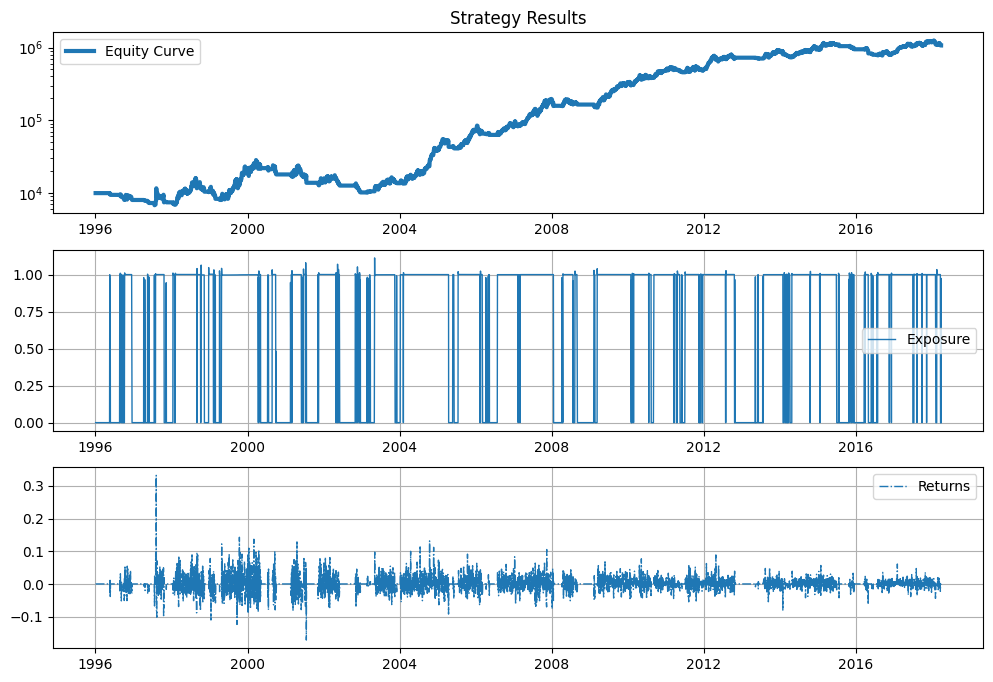

In [ ]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import Zipline functions that we need
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol

# Import visualization
import matplotlib.pyplot as plt

# Import Pandas
import pandas as pd


def initialize(context):
    # Which stock to trade
    context.stock = symbol("AAPL")

    # Moving average window
    context.index_average_window = 100


def handle_data(context, data):
    # Request history for the stock
    equities_hist = data.history(
        context.stock, "close", context.index_average_window, "1d"
    )

    # Check if price is above moving average
    if equities_hist.iloc[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0

    # Place order
    order_target_percent(context.stock, stock_weight)


def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))

    # First chart
    ax = fig.add_subplot(311)
    ax.set_title("Strategy Results")
    ax.semilogy(
        perf["portfolio_value"], linestyle="-", label="Equity Curve", linewidth=3.0
    )
    ax.legend()
    ax.grid(False)

    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf["gross_leverage"], label="Exposure", linestyle="-", linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf["returns"], label="Returns", linestyle="-.", linewidth=1.0)
    ax.legend()
    ax.grid(True)


# Set start and end date
start_date = pd.Timestamp("1996-01-01")
end_date = pd.Timestamp("2018-03-28")

# Fire off the backtest
results = run_algorithm(
    start=start_date,
    end=end_date,
    initialize=initialize,
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency="daily",
    bundle="quandl",
)